# FFT Example

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import math

import wave
from pathlib import Path
from typing import Tuple

import scipy.signal as signal
import scipy.fft as fft

## Create a time domain signal

In [32]:
fs = 40.0               # sampling freq
T = 1.0 / fs            # sampling period
N = 40.0                # length of the signal
t = np.arange(N) * T  # time vector
t

array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
       0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
       0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 ,
       0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 , 0.875,
       0.9  , 0.925, 0.95 , 0.975])

In [33]:
x = 2 * math.pi * 3
Xn = np.array([math.sin(x * ti) for ti in t])  # 3 Hz signal
Xn

array([ 0.00000000e+00,  4.53990500e-01,  8.09016994e-01,  9.87688341e-01,
        9.51056516e-01,  7.07106781e-01,  3.09016994e-01, -1.56434465e-01,
       -5.87785252e-01, -8.91006524e-01, -1.00000000e+00, -8.91006524e-01,
       -5.87785252e-01, -1.56434465e-01,  3.09016994e-01,  7.07106781e-01,
        9.51056516e-01,  9.87688341e-01,  8.09016994e-01,  4.53990500e-01,
        3.67394040e-16, -4.53990500e-01, -8.09016994e-01, -9.87688341e-01,
       -9.51056516e-01, -7.07106781e-01, -3.09016994e-01,  1.56434465e-01,
        5.87785252e-01,  8.91006524e-01,  1.00000000e+00,  8.91006524e-01,
        5.87785252e-01,  1.56434465e-01, -3.09016994e-01, -7.07106781e-01,
       -9.51056516e-01, -9.87688341e-01, -8.09016994e-01, -4.53990500e-01])

Text(0, 0.5, 'Xn[i]')

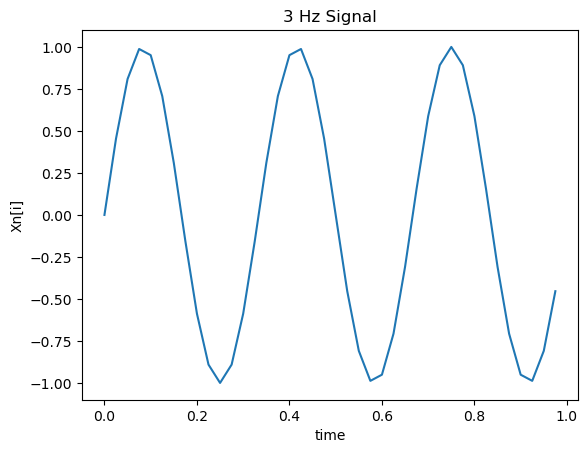

In [34]:
plt.plot(t, Xn)
plt.title('3 Hz Signal')
plt.xlabel('time')
plt.ylabel('Xn[i]')

## One sided FFT

In [35]:
#Y = tf.signal.fft()
Y = np.fft.rfft(Xn)  # 1-dimensional FFT
Y

array([-3.05311332e-16+0.00000000e+00j, -2.95685906e-16+8.10886926e-17j,
       -7.54564082e-16-9.46173286e-17j,  1.97219263e-15-2.00000000e+01j,
        3.06568793e-15+1.17815768e-15j, -1.60087692e-15+2.74640720e-15j,
       -1.10118585e-15-1.12454308e-16j, -5.82180036e-16+2.38919466e-15j,
       -3.41909934e-15+1.64892956e-15j,  1.86468143e-15-3.22574160e-15j,
        3.16413562e-15+1.08246745e-15j, -1.19805636e-15+2.47166317e-15j,
       -1.74034419e-15-7.93561091e-16j, -2.13477284e-15+2.38919466e-15j,
       -3.36238525e-17-1.98168186e-15j, -6.19569131e-16-2.47164102e-15j,
        1.04816276e-15+7.73411100e-16j,  1.97219263e-15-1.77635684e-15j,
        9.24191067e-16-7.60751143e-16j, -3.14030967e-15+1.37547083e-16j,
        5.52335955e-15+0.00000000e+00j])

Text(0.5, 0, 'frequency')

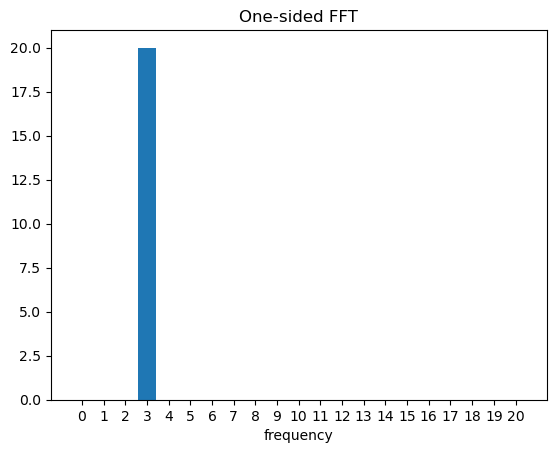

In [36]:
k = np.arange(N/2+1)  # add 1 for the nyquist freq
freq = k * fs / N 

plt.bar(freq, np.abs(Y))
plt.xticks(freq)
plt.title('One-sided FFT')
plt.xlabel('frequency')

In [37]:
# Utility function that reads the whole `wav` file content into a numpy array
def wave_read(filename: Path) -> Tuple[np.ndarray, int]:
    with wave.open(str(filename), 'rb') as f:
        buffer = f.readframes(f.getnframes())
        inter = np.frombuffer(buffer, dtype=f'int{f.getsampwidth()*8}')
        return np.reshape(inter, (-1, f.getnchannels())), f.getframerate()

DATASET_PATH = '../data'

data_dir = Path(DATASET_PATH)

wav, frame_rate = wave_read(data_dir/'test/h_yes.wav')
wav = wav.flatten()              # 1-D array

# From tf.audio.decode_wav
# The -32768 to 32767 signed 16-bit values will be scaled to -1.0 to 1.0 in float.
wav = wav / 32768.0

In [38]:
Y = np.fft.rfft(wav)
N = wav.shape[0]
fs = 16000
k = np.arange(N/2+1)  # add 1 for the nyquist freq
freq = k * fs / N / 100
Y

array([ 0.0010376 +0.j        ,  0.0118033 +0.01095816j,
       -0.0109763 +0.01236125j, ...,  0.45528061-0.22835268j,
        0.05073619+0.42366961j, -0.27282715+0.j        ])

<Axes: >

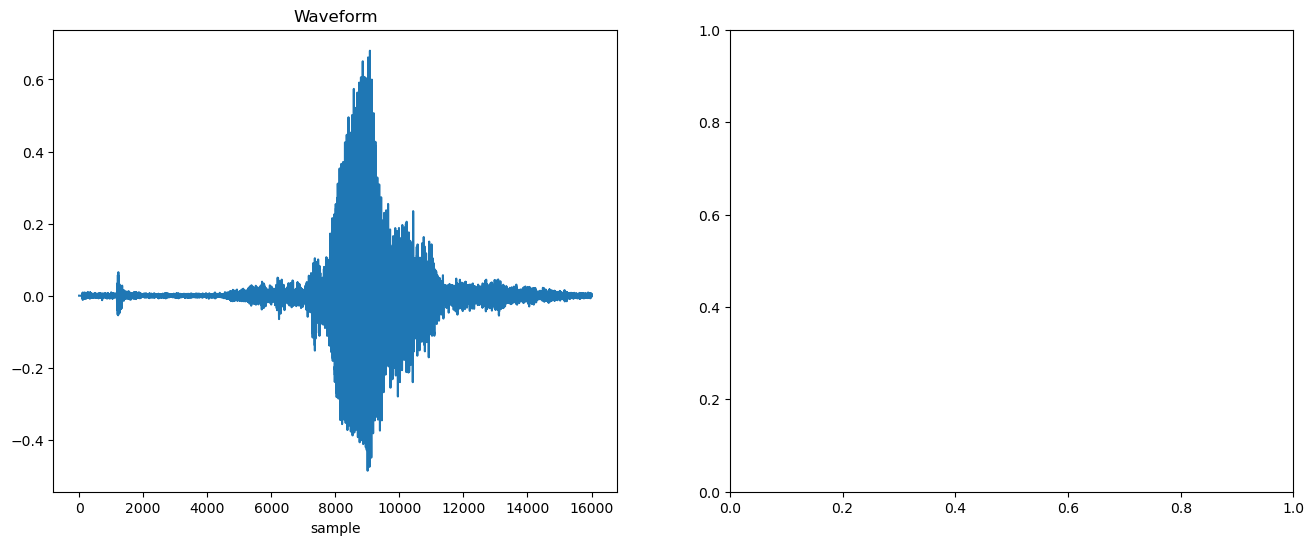

In [39]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
timescale = np.arange(wav.shape[0])
plt.plot(timescale, wav)
plt.title('Waveform')
plt.xlabel('sample')

plt.subplot(1,2,2)
#plt.bar(freq, np.abs(Y))
#plt.xticks(freq)
#plt.title('One-sided FFT')
#plt.xlabel('frequency')

In [40]:
def spectrogram(samples, frame_len=256, frame_step=128):
    """
    Computes a magnitude spectrogram for a given vector of samples at a given
    frame length (in samples) and frame step (in samples).
    """
    rfft = np.fft.rfft
    
    if len(samples) < frame_len:
        return np.empty((0, frame_len // 2 + 1), dtype=samples.dtype)

    win = np.hanning(frame_len).astype(samples.dtype)
    num_frames = max(0, (len(samples) - frame_len) // frame_step + 1)
    rfft_samples = [np.abs(rfft(samples[pos:pos + frame_len] * win))
                    for pos in range(0, len(samples) - frame_len + 1,
                                     int(frame_step))]
    spect = np.vstack(rfft_samples)

    return spect

In [41]:
np_spec = spectrogram(wav)
np_spec.shape, np_spec.dtype, np_spec[0,:10]

((124, 129),
 dtype('float64'),
 array([0.00022177, 0.00240189, 0.00829614, 0.01248005, 0.01059881,
        0.0115205 , 0.01875571, 0.02414375, 0.04094181, 0.09471817]))

In [42]:
def get_spectrogram(waveform):
    # Convert the waveform to a spectrogram via a STFT
    spectrogram = tf.signal.stft(waveform, frame_length=255, frame_step=128)

    # Obtain the magnitude of the STFT
    spectrogram = tf.abs(spectrogram)

    # Add a 'channels' dimension, so that the spectrogram can be used as an
    # image-like input data w/ convolution layers, which expect shape
    # (batch_size, height, width, channels)
    spectrogram = spectrogram[..., tf.newaxis]
    return spectrogram

In [43]:
tf_spec = get_spectrogram(wav)
tf_spec.shape, tf_spec[0,:10,:]

(TensorShape([124, 129, 1]),
 <tf.Tensor: shape=(10, 1), dtype=float64, numpy=
 array([[0.00021577],
        [0.00242205],
        [0.00827248],
        [0.01238501],
        [0.01051275],
        [0.01144112],
        [0.01872323],
        [0.02427843],
        [0.04116756],
        [0.09470176]])>)

In [44]:
def plot_spectrogram(spectrogram, ax):
    if len(spectrogram.shape) > 2:
        assert len(spectrogram.shape) == 3
        spectrogram = np.squeeze(spectrogram, axis=-1)

    # Convert the frequencies to log scale and transpose so that the time is
    # represented on the x-axis (columns).
    # Add an epsilon to avoid taking a log of zero.
    log_spec = np.log(spectrogram.T + np.finfo(float).eps)
    height = log_spec.shape[0]  # rows
    width = log_spec.shape[1]   # cols
    X = np.linspace(0, np.size(spectrogram), num=width, dtype=int)
    Y = range(height)
    ax.pcolormesh(X, Y, log_spec)

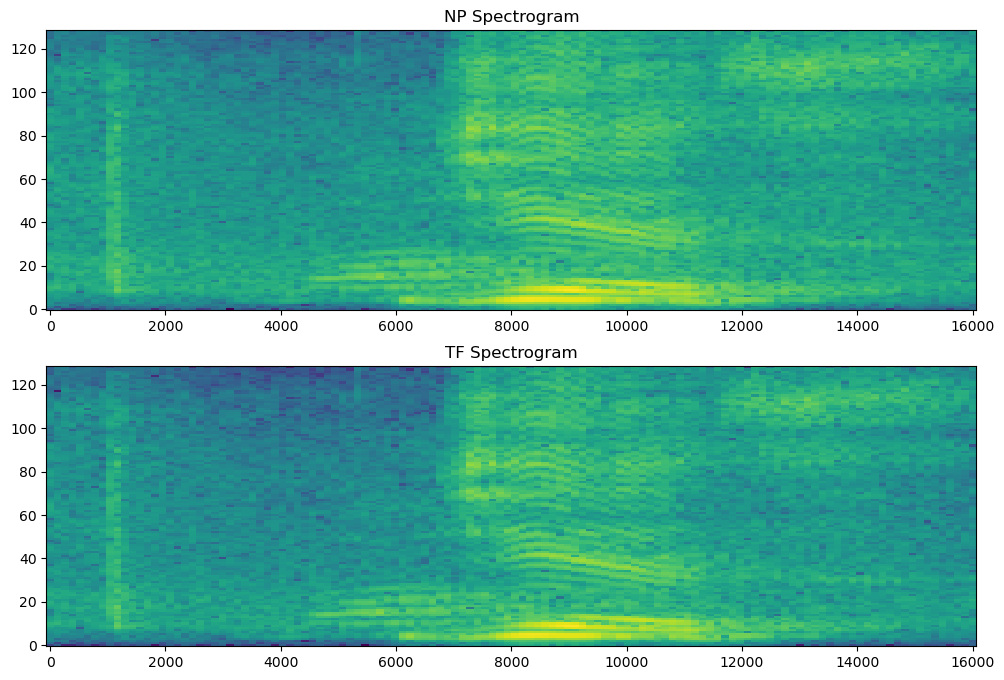

In [45]:
fig, axes = plt.subplots(2, figsize=(12,8))
plot_spectrogram(np_spec, axes[0])
axes[0].set_title('NP Spectrogram')
#plt.suptitle(label.title())

plot_spectrogram(tf_spec.numpy(), axes[1])
axes[1].set_title('TF Spectrogram')
#plt.suptitle(label.title())
plt.show()

In [46]:
# make consistent with tensorflow's spectrogram shape
npy_spec_out = np.expand_dims(np_spec, axis=0)
npy_spec_out = np.expand_dims(npy_spec_out, axis=-1)
npy_spec_out.shape, npy_spec_out[0,0,:4]

((1, 124, 129, 1),
 array([[0.00022177],
        [0.00240189],
        [0.00829614],
        [0.01248005]]))

In [47]:
np.save(data_dir/'test/h_yes_spec.npy', npy_spec_out)

In [48]:
npy_spec_in = np.load(data_dir/'test/h_yes_spec.npy')
npy_spec_in.shape

(1, 124, 129, 1)

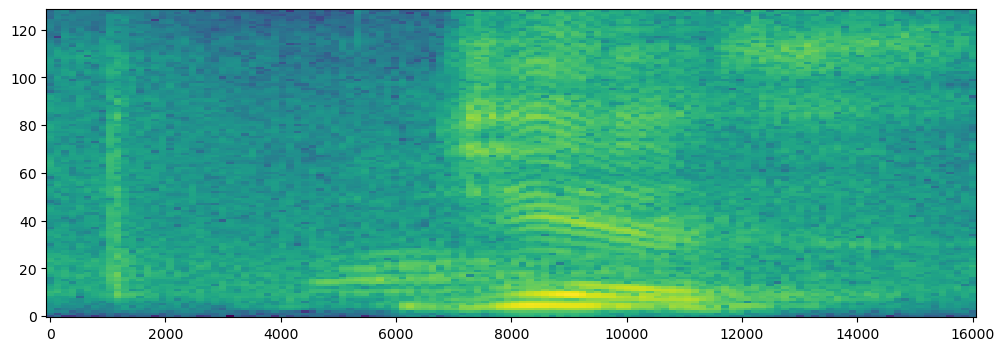

In [49]:
fig, axes = plt.subplots(1, figsize=(12,4))
plot_spectrogram(npy_spec_in[0], axes)